In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Covid.csv")

In [4]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [6]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [7]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


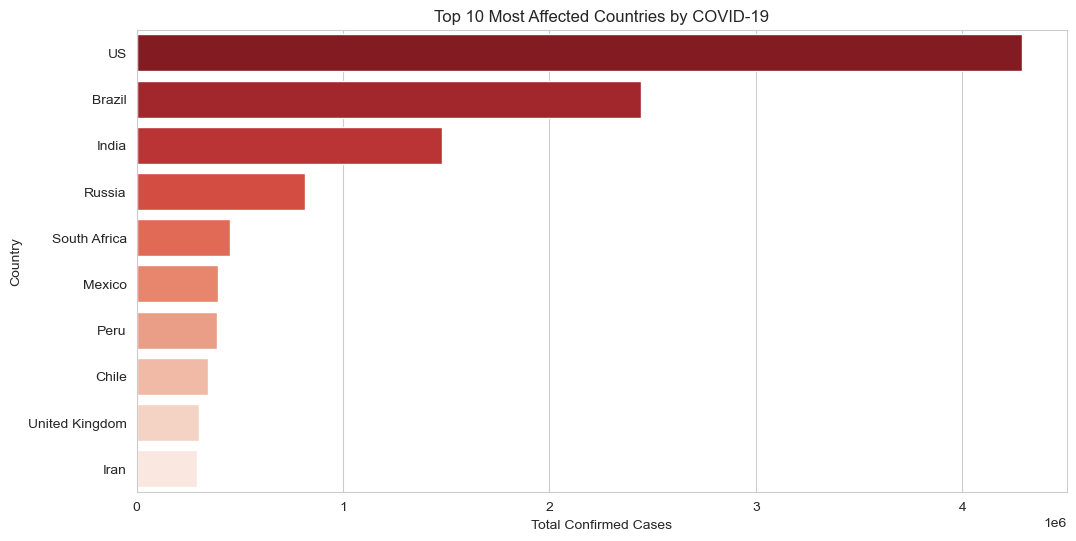

In [8]:
# Top 10 countries by confirmed cases
top_countries = df[['Country/Region', 'Confirmed']].sort_values(by='Confirmed', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='Reds_r')
plt.xlabel("Total Confirmed Cases")
plt.ylabel("Country")
plt.title("Top 10 Most Affected Countries by COVID-19")
plt.show()

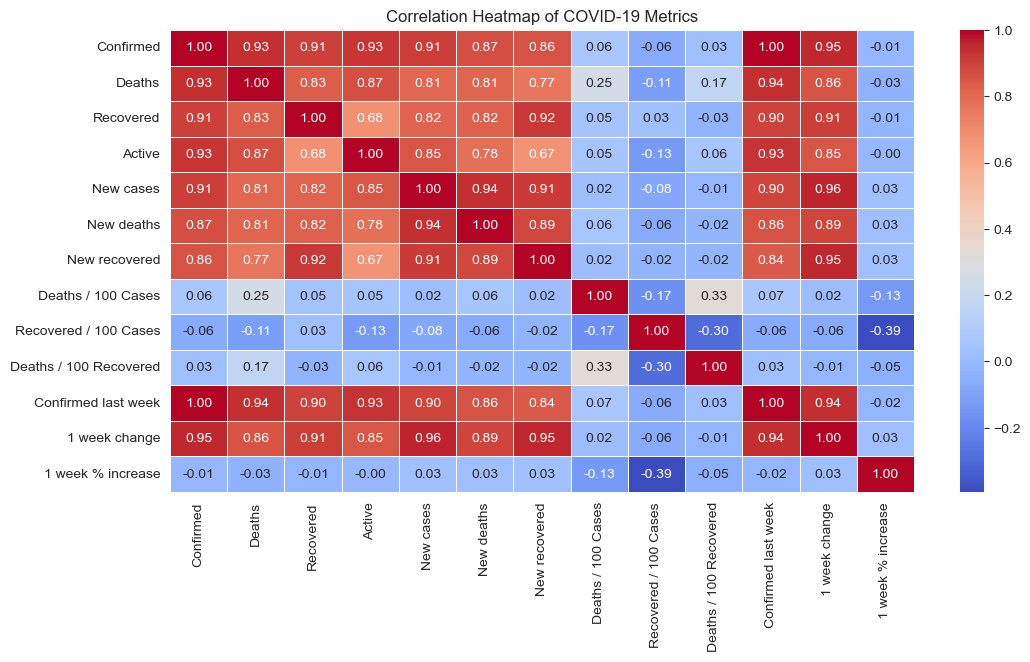

In [9]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of COVID-19 Metrics")
plt.show()

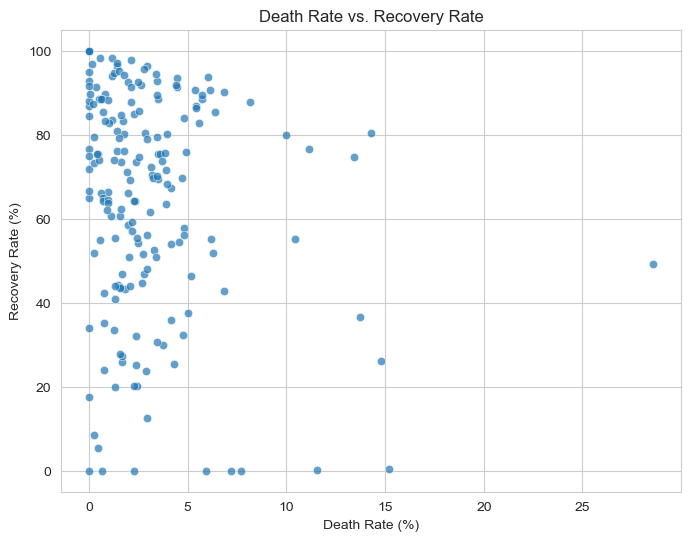

In [10]:
# Scatter plot: Death Rate vs. Recovery Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Deaths / 100 Cases'], y=df['Recovered / 100 Cases'], alpha=0.7)
plt.xlabel("Death Rate (%)")
plt.ylabel("Recovery Rate (%)")
plt.title("Death Rate vs. Recovery Rate")
plt.grid(True)
plt.show()

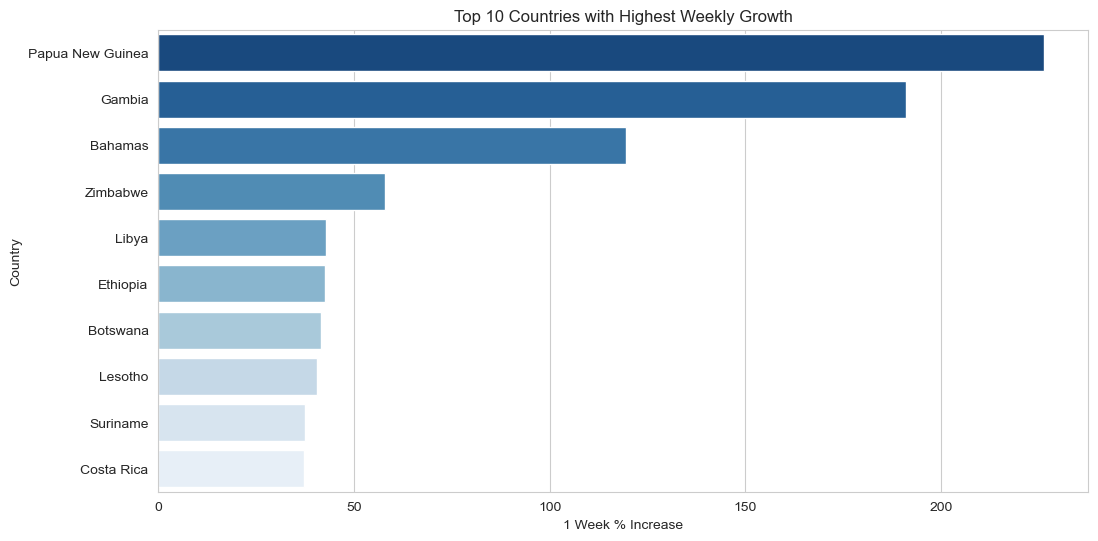

In [11]:
# Top 10 countries with the highest weekly % increase
top_growth = df[['Country/Region', '1 week % increase']].sort_values(by='1 week % increase', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='1 week % increase', y='Country/Region', data=top_growth, palette='Blues_r')
plt.xlabel("1 Week % Increase")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Weekly Growth")
plt.show()

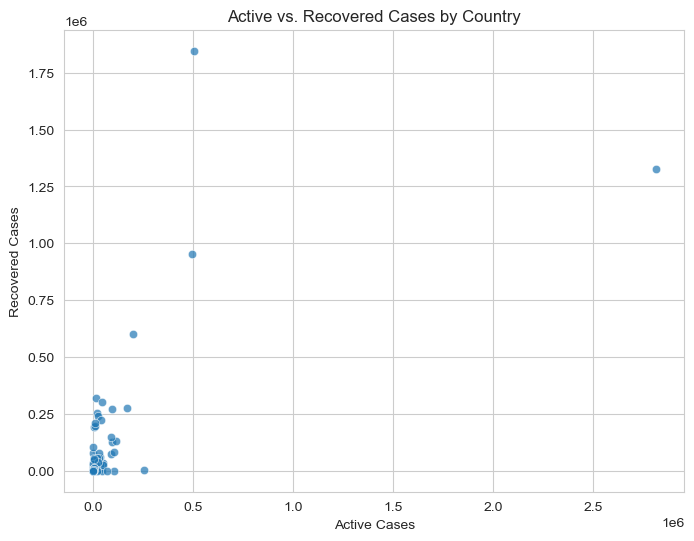

In [12]:
# Scatter plot: Active vs. Recovered cases
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Active'], y=df['Recovered'], alpha=0.7)
plt.xlabel("Active Cases")
plt.ylabel("Recovered Cases")
plt.title("Active vs. Recovered Cases by Country")
plt.grid(True)
plt.show()

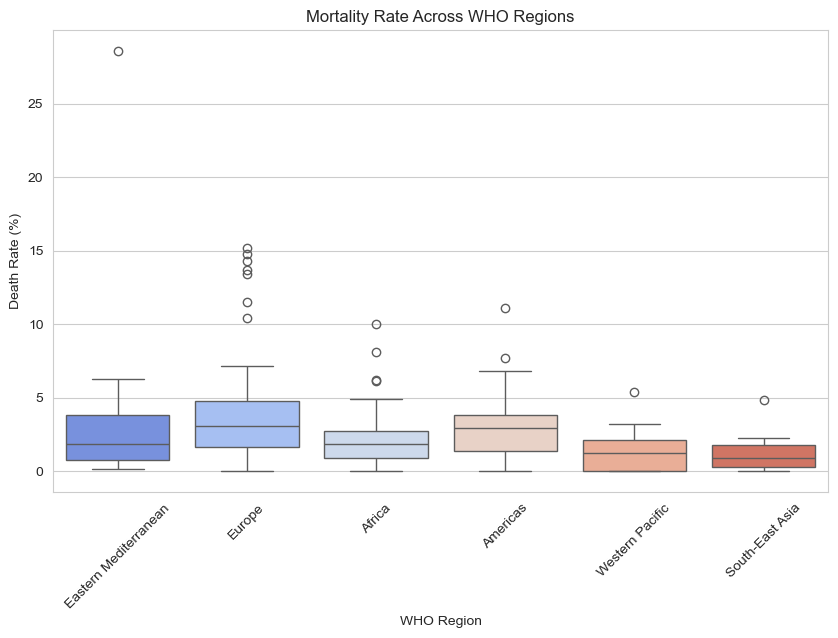

In [13]:
# Boxplot of death rate by WHO region
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['WHO Region'], y=df['Deaths / 100 Cases'], palette='coolwarm')
plt.xlabel("WHO Region")
plt.ylabel("Death Rate (%)")
plt.title("Mortality Rate Across WHO Regions")
plt.xticks(rotation=45)
plt.show()

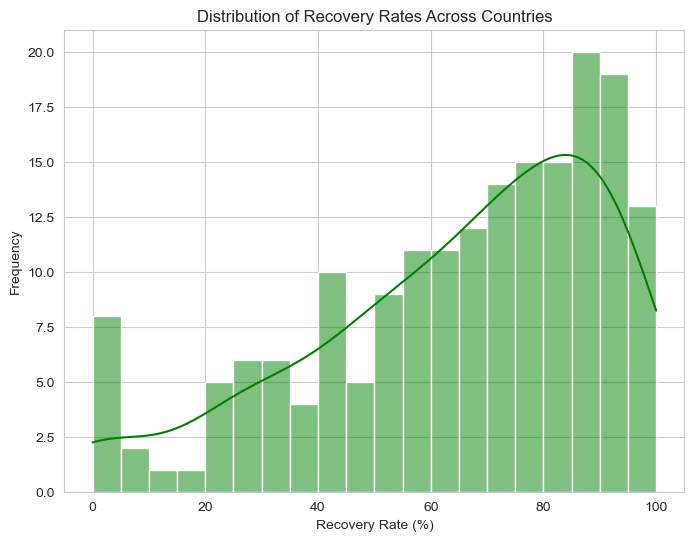

In [14]:
# Histogram of recovery rate
plt.figure(figsize=(8, 6))
sns.histplot(df['Recovered / 100 Cases'], bins=20, kde=True, color='green')
plt.xlabel("Recovery Rate (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Recovery Rates Across Countries")
plt.show()

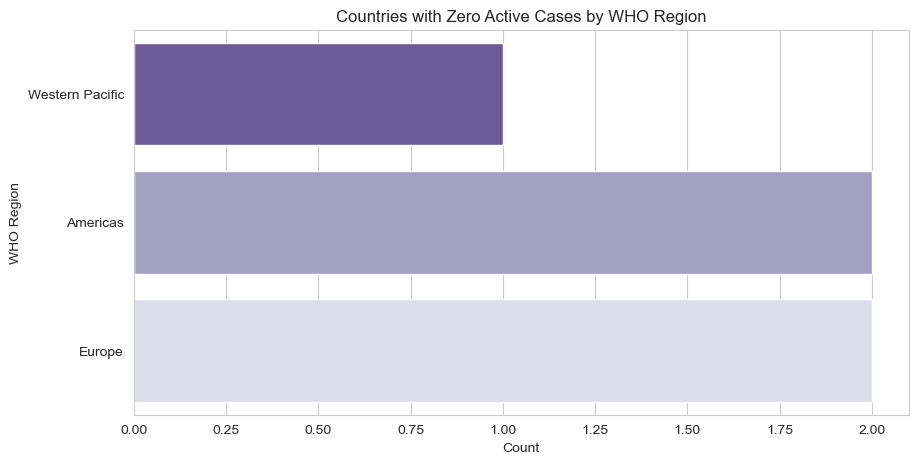

In [15]:
# Countries with zero active cases
zero_active = df[df['Active'] == 0]

# Count plot
plt.figure(figsize=(10, 5))
sns.countplot(y=zero_active['WHO Region'], palette='Purples_r')
plt.xlabel("Count")
plt.ylabel("WHO Region")
plt.title("Countries with Zero Active Cases by WHO Region")
plt.show()
